In [1]:
import os
import numpy as np
from PIL import Image
from histomicstk.preprocessing.augmentation.color_augmentation import rgb_perturb_stain_concentration
# import staintools
# import argparse
from numpy import asarray

# parser = argparse.ArgumentParser(description='Run stain aug.')
# parser.add_argument('--filename', type=str, help='filename')
# parser.add_argument('--transform_type', type=str, help='transform type: stain_aug or stain_norm')
# 
# args = parser.parse_args()
# print(args.filename)
# print(args.transform_type)


In [26]:
def stain_aug(data, sigma1, sigma2):
    rgbaug = rgb_perturb_stain_concentration(data, sigma1=sigma1, sigma2=sigma2)
    # print(type(rgbaug))
    im = Image.fromarray(rgbaug)
    display(im)

In [3]:
def get_stain_normalizer(method='macenko'):
    target = staintools.read_image('stain_norm_ref.png')
    target = staintools.LuminosityStandardizer.standardize(target)
    normalizer = staintools.StainNormalizer(method=method)
    normalizer.fit(target)
    return normalizer

def apply_stain_norm(tile, normalizer):
    to_transform = np.array(tile).astype('uint8')
    to_transform = staintools.LuminosityStandardizer.standardize(to_transform)
    try:
        transformed = normalizer.transform(to_transform)
    except Exception:  # TissueMaskException
        return tile
    return transformed

/home/users/stellasu/histopathology_augmentation/NORM_subset/NORM-RAQIRLCD.tif


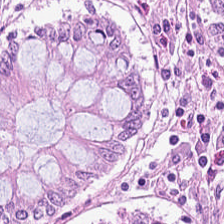

<class 'numpy.ndarray'>
(224, 224, 3)


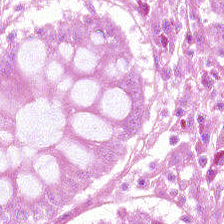

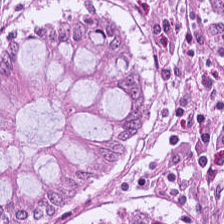

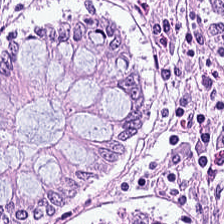

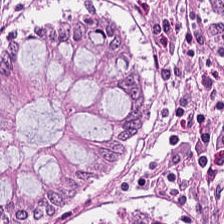

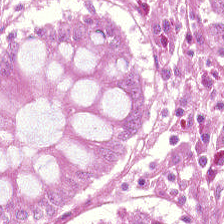

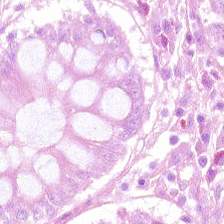

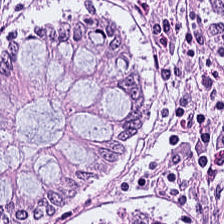

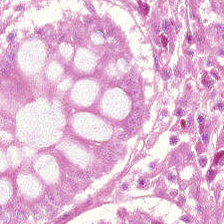

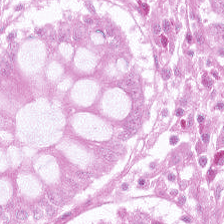

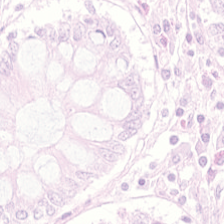

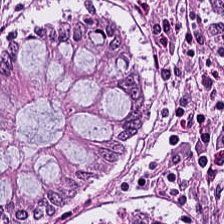

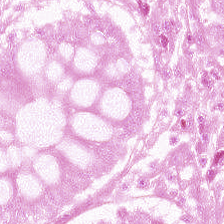

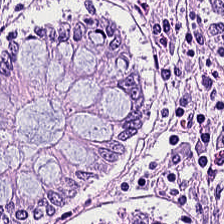

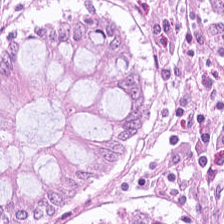

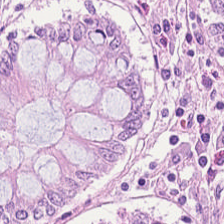

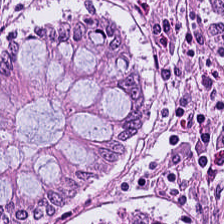

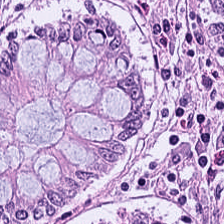

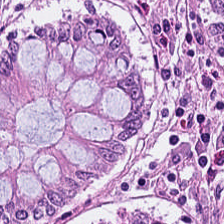

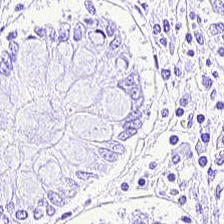

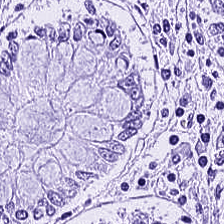

In [6]:
# path = '/scratch/groups/rubin/stellasu/wilds/camelyon17_v1.0/val/1/'
# filename = 'patch_patient_009_node_1_x_12096_y_34656.png'
# filename = 'patch_patient_080_node_1_x_18400_y_7904.png'
# filename = 'patch_patient_020_node_4_x_16000_y_30400.png'
# filename = 'patch_patient_073_node_1_x_1376_y_41696.png'
# path = '/scratch/groups/rubin/stellasu/wilds/camelyon17_v1.0/test/1/'
# filename = 'patch_patient_042_node_3_x_21344_y_8864.png'
path = '/home/users/stellasu/histopathology_augmentation/NORM_subset/'
filename = 'NORM-RAQIRLCD.tif'
# transform_type = 'stain_norm'
transform_type = 'stain_aug'
# load the image
print(path+filename)
image = Image.open(path+filename)
display(image)
# print(image.mode)
# newsize = (224, 224)
# image = image.resize(newsize)
# convert image to numpy array
data = asarray(image)
data = data[:,:,:3]
print(type(data))
# summarize shape
print(data.shape)
if transform_type == 'stain_aug':
    for i in range(20):
        rgbaug = rgb_perturb_stain_concentration(data, sigma1=1., sigma2=1.)
        # print(type(rgbaug))
        im = Image.fromarray(rgbaug)
        display(im)
        fn = filename[:-4] + '_' + str(i) + '_stain_aug.png'
        im.save(fn)
else:
#     sample = np.array(sample)
    normalizer = get_stain_normalizer()
    rgb_normalized = apply_stain_norm(data, normalizer)
    im = Image.fromarray(rgb_normalized)
    display(im)
    fn = filename[:-4] + '_stain_norm.png'
    im.save(fn)

    
# stain_aug(data, 1.0, 1.0)